In [60]:
#Control
import json
import os
import sys
import glob
import subprocess

#Ploting
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import rcParams
from matplotlib.animation import FuncAnimation
import matplotlib.ticker as tick
rcParams['text.usetex'] = False
rcParams['lines.linewidth'] = 0.5
rcParams['font.size'] = 16

# Processing
import numpy as np
from statsmodels.tsa.stattools import adfuller

# Inspect some of the time series
## First determine the names of the time series here

In [72]:
files = sorted(glob.glob("*interpolated.txt*"))
for i in range(0,len(files)):
    print("File "+repr(i) +" is: "+ files[i].strip())

File 0 is: 00001-rbc_RA1e8_nelv21k_lx8_interpolated.txt
File 1 is: 00002-rbc_RA1e9_nelv21k_lx8_interpolated.txt
File 2 is: 00003-rbc_RA1e10_nelv21k_lx8_interpolated.txt
File 3 is: 00004-rbc_RA1e11_nelv21k_lx8_interpolated.txt
File 4 is: 00005-rbc_RA1e8_nelv46k_lx8_interpolated.txt
File 5 is: 00006-rbc_RA1e9_nelv46k_lx8_interpolated.txt
File 6 is: 00007-rbc_RA1e10_nelv46k_lx8_interpolated.txt
File 7 is: 00008-rbc_RA1e11_nelv46k_lx8_interpolated.txt
File 8 is: 00009-rbc_RA1e8_nelv100k_lx8_interpolated.txt
File 9 is: 00010-rbc_RA1e9_nelv100k_lx8_interpolated.txt
File 10 is: 00011-rbc_RA1e10_nelv100k_lx8_interpolated.txt
File 11 is: 00012-rbc_RA1e11_nelv100k_lx8_interpolated.txt
File 12 is: 00013-rbc_RA1e8_nelv2m_lx3_ar1_interpolated.txt


## Read the data

In [73]:
data = []
for i in range(0,len(files)):
    dat = np.loadtxt(files[i].strip())
    data.append(dat)

## Process the data

### Visualize rayleigh and lx to confirm if they have changed in the simulation

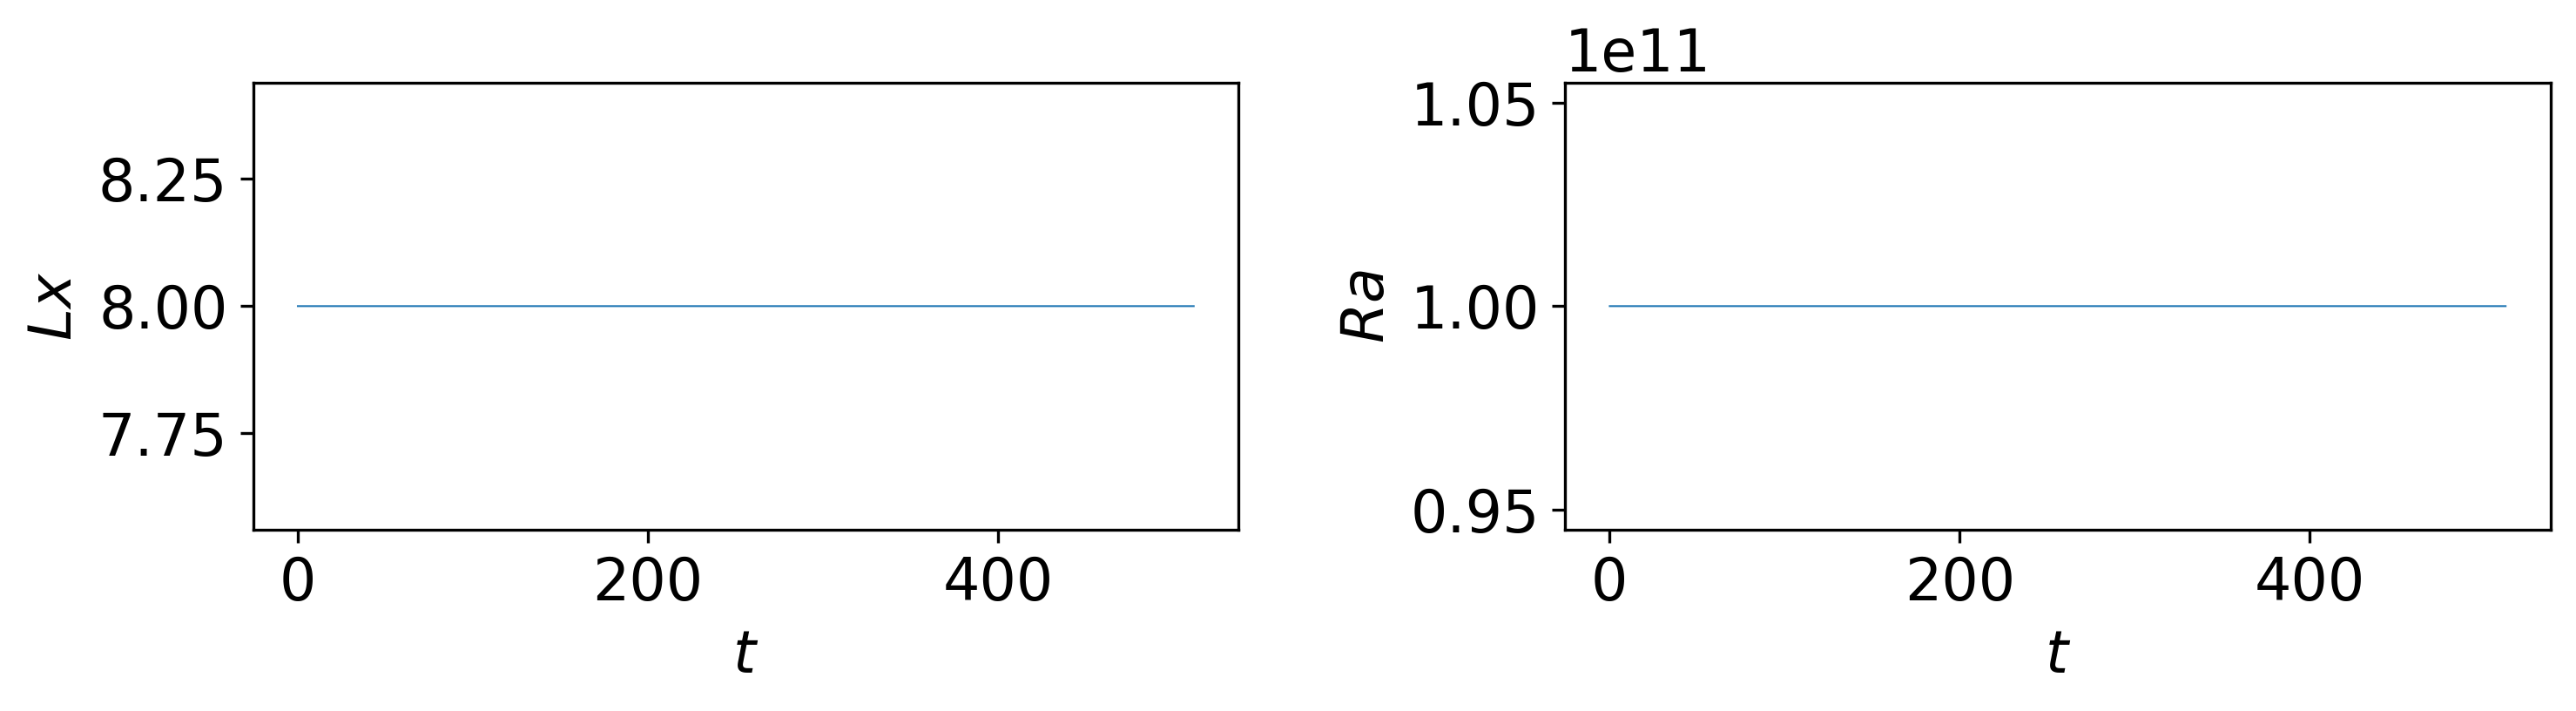

In [74]:
dat = data[3]

t = dat[:,0]
uzt = dat[:,1]
dtdz_top = abs(dat[:,2])
dtdz_bot = abs(dat[:,3])
lx = dat[:,4]
Ra = dat[:,5]

fig, ax = plt.subplots(1, 2,figsize=(10, 3), dpi=300)

ax[0].plot(t, lx)
ax[0].set_xlabel(r'$t$')
ax[0].set_ylabel(r'$Lx$')
#ax[0].axvline(x=t_a_ts[i][it_a[i]], color=colors[i], linestyle=':')

ax[1].plot(t, Ra)
ax[1].set_xlabel(r'$t$')
ax[1].set_ylabel(r'$Ra$')
#ax[1].set_ylim(0,4)
#ax[1].axvline(x=t_va_ts[i][it_va[i]], color=colors[i], linestyle=':')

plt.tight_layout()
plt.show()

### Visualize Nusselt number

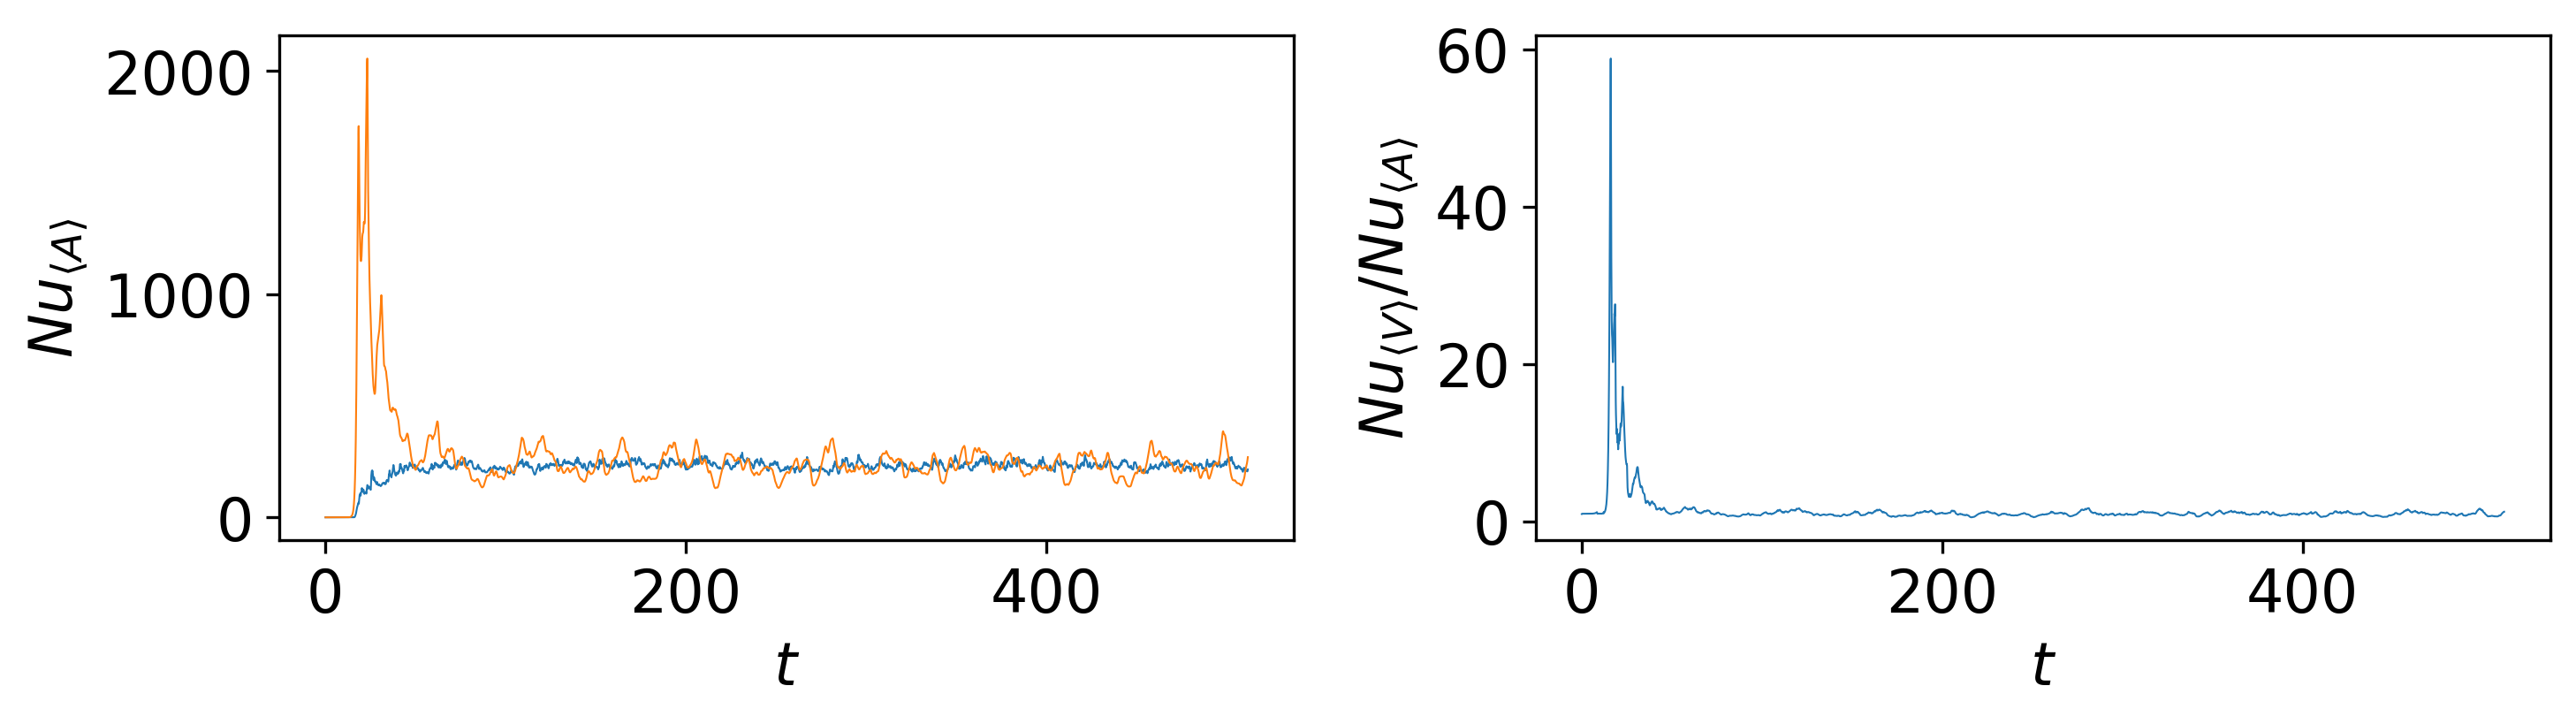

In [75]:
ra = Ra[0]
Nu_v = 1 + np.sqrt(ra)*uzt
Nu_a = (dtdz_top + dtdz_bot)/2
Nu_va = Nu_v/Nu_a

fig, ax = plt.subplots(1, 2,figsize=(10, 3), dpi=300)
        
ax[0].plot(t, Nu_a)
ax[0].plot(t, Nu_v)
ax[0].set_xlabel(r'$t$')
ax[0].set_ylabel(r'$Nu_{\langle A \rangle}$')
#ax[0].axvline(x=t_a_ts[i][it_a[i]], color=colors[i], linestyle=':')

ax[1].plot(t, Nu_va,)
ax[1].set_xlabel(r'$t$')
ax[1].set_ylabel(r'$Nu_{\langle V \rangle}/Nu_{\langle A \rangle}$')
#ax[1].set_ylim(0,4)
#ax[1].axvline(x=t_va_ts[i][it_va[i]], color=colors[i], linestyle=':')

plt.tight_layout()
plt.savefig("nu_timeseries.pdf", format="pdf", bbox_inches="tight")
plt.show()